<a href="https://colab.research.google.com/github/PradeepKumar00786/Diabeties_Prediction_project_01/blob/main/Diabeties_Prediction_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIABETES PREDICTION
***

# OBJECTIVES
***
* **To build a supervise machine learning model (based on given data) that takes patient details input like age, blood pressure, insulin etc, and predict patient has Diabetes or not.**
* **To use and explore knowledge and skills.**

# CLEANING RAW DATA AND DATA EXPLORATION USING PANDAS, NUMPY, SEABORN, MATPLOTLIB.
***

In [ ]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading/reading dataset
df = pd.read_csv("/content/drive/MyDrive/Project_02/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

our dataset has 768 row and 9 columns 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Glucose, Bloodpressure, SkinThickness, Insulin, BMI can't become zero. 
* so we should replace zero valeues with mean, median or mode.

In [ ]:
#replace zero with np.nan using loop
zero_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for i in zero_value:
    df[i].replace(0,np.nan, inplace=True)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


here in insulin columns about 50% values are null so we will drop that columns because if we imput missing values then our ml model will not perform better because dataset will change at a very large level.

In [ ]:
df=df.drop(["Insulin"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 48.1 KB


In [ ]:
#counting null values column wise
count1 = pd.concat([df.isnull().sum()], axis=1, keys=["df"])
count1[count1.sum(axis=1)>0]

,df
Glucose,5
BloodPressure,35
SkinThickness,227
BMI,11


In [ ]:
#removing outliers
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] =  percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df
final_df=cap_data(df)

capping the  Pregnancies
capping the  Glucose
capping the  BloodPressure
capping the  SkinThickness
capping the  BMI
capping the  DiabetesPedigreeFunction
capping the  Age
capping the  Outcome


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


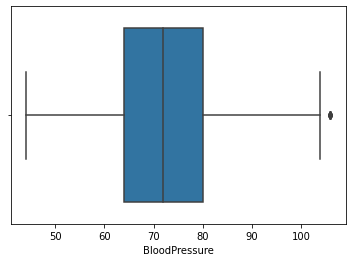

In [ ]:
sns.boxplot(data=df, x=df["BloodPressure"])

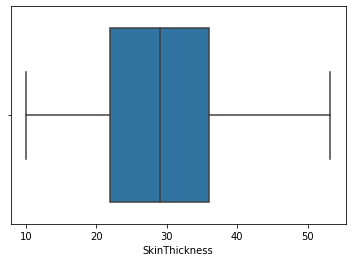

In [ ]:
sns.boxplot(data=df, x=df["SkinThickness"])

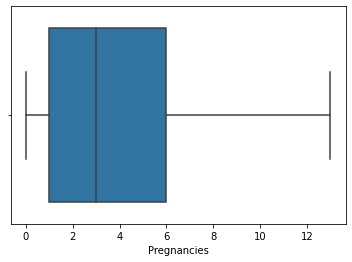

In [ ]:
sns.boxplot(data=df, x= df["Pregnancies"])

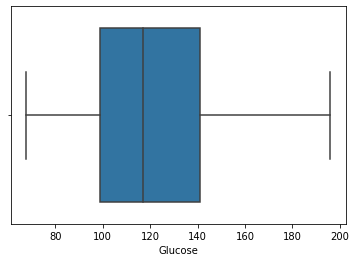

In [ ]:
sns.boxplot(data=df, x=df["Glucose"])

In [ ]:
#replacing np.nan to mode using imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imp.fit_transform(df)
df2 = pd.DataFrame(X, columns=df.columns)
df2['Outcome']=df2['Outcome'].round().astype('int64')
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.621042,72.319010,29.920833,32.404422,0.468461,33.205729,0.348958
std,3.336808,30.273443,11.712708,8.451921,6.674350,0.314849,11.645318,0.476951
min,0.000000,67.620000,44.000000,10.000000,19.500000,0.094680,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,13.000000,196.000000,106.000000,53.200000,51.012000,1.698330,67.000000,1.000000


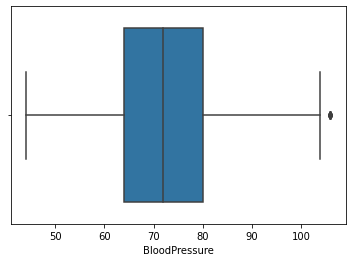

In [ ]:
sns.boxplot(data=df2, x=df2["BloodPressure"])

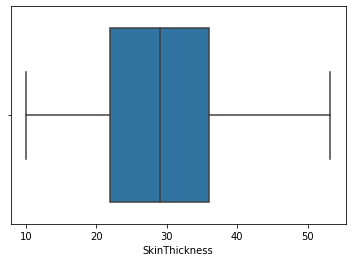

In [ ]:
sns.boxplot(data=df, x= df["SkinThickness"])

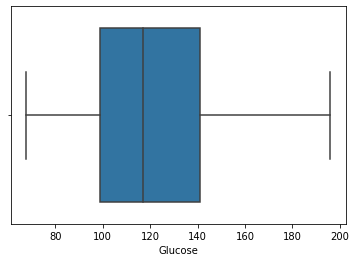

In [ ]:
sns.boxplot(data=df, x= df["Glucose"])

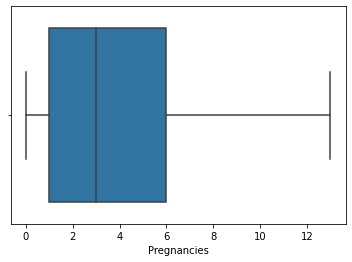

In [ ]:
sns.boxplot(data=df, x=df["Pregnancies"])

In [ ]:
df2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.62700,50.0,1
1,1.0,85.0,66.0,29.0,26.6,0.35100,31.0,0
2,8.0,183.0,64.0,32.0,23.3,0.67200,32.0,1
3,1.0,89.0,66.0,23.0,28.1,0.16700,21.0,0
4,0.0,137.0,44.0,35.0,43.1,1.69833,33.0,1
5,5.0,116.0,74.0,32.0,25.6,0.20100,30.0,0
6,3.0,78.0,50.0,32.0,31.0,0.24800,26.0,1
7,10.0,115.0,70.0,32.0,35.3,0.13400,29.0,0
8,2.0,196.0,70.0,45.0,30.5,0.15800,53.0,1
9,8.0,125.0,96.0,32.0,32.0,0.23200,54.0,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    float64
 7   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 48.1 KB


In [ ]:
#couning null values after imputing
count2 = pd.concat([df2.isnull().sum()], axis=1, keys=["df2"])
count2[count2.sum(axis=1)>0]

,df2


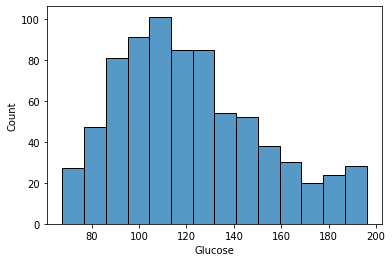

In [ ]:
#histplot to view glucose's distribution
sns.histplot(data=df2, x=df["Glucose"])

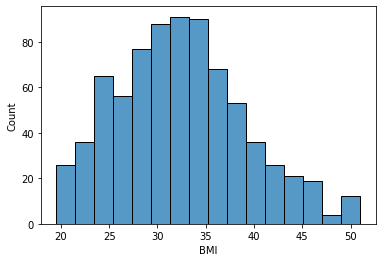

In [ ]:
sns.histplot(data=df2, x=df2["BMI"])

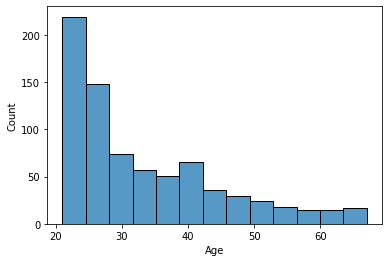

In [ ]:
sns. histplot(data=df2, x=df2["Age"])

# Feature Engineering

In [ ]:
#creating bines of age group
pr_lab=['veryLow', 'Low','Medium','High', 'superHigh']
df2['AgeLavel']=pr_bins=pd.cut(df2['Age'],bins=5,labels=pr_lab,precision=0)

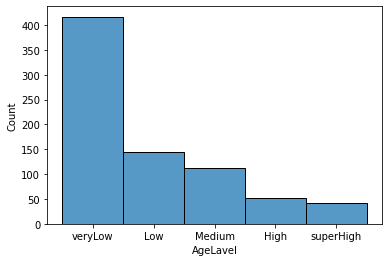

In [ ]:
sns.histplot(data=df2, x=df2["AgeLavel"])

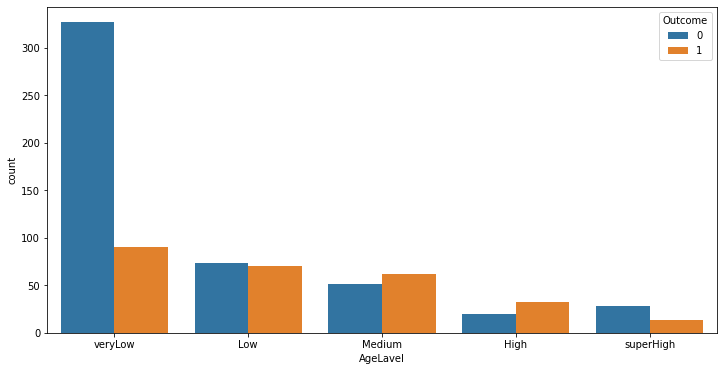

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(hue='Outcome',x='AgeLavel', data=df2,ax=ax)

basic, average high age group has high probability to diabetes. And low age group has very less chance to diabetes.

In [ ]:
df2.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeLavel
758,1.0,106.0,76.0,32.0,37.5,0.197,26.0,0,veryLow
759,6.0,190.0,92.0,32.0,35.5,0.278,66.0,1,superHigh
760,2.0,88.0,58.0,26.0,28.4,0.766,22.0,0,veryLow
761,9.0,170.0,74.0,31.0,44.0,0.403,43.0,1,Medium
762,9.0,89.0,62.0,32.0,22.5,0.142,33.0,0,Low
763,10.0,101.0,76.0,48.0,32.9,0.171,63.0,0,superHigh
764,2.0,122.0,70.0,27.0,36.8,0.340,27.0,0,veryLow
765,5.0,121.0,72.0,23.0,26.2,0.245,30.0,0,veryLow
766,1.0,126.0,60.0,32.0,30.1,0.349,47.0,1,Medium
767,1.0,93.0,70.0,31.0,30.4,0.315,23.0,0,veryLow


In [ ]:
df2=df2.drop(['AgeLavel'], axis=1)

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.62700,50.0,1
1,1.0,85.0,66.0,29.0,26.6,0.35100,31.0,0
2,8.0,183.0,64.0,32.0,23.3,0.67200,32.0,1
3,1.0,89.0,66.0,23.0,28.1,0.16700,21.0,0
4,0.0,137.0,44.0,35.0,43.1,1.69833,33.0,1


In [ ]:
#checking correlation between features 
corr_matrix = df2.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492345
BMI                         0.312901
Age                         0.242215
SkinThickness               0.220517
Pregnancies                 0.219811
DiabetesPedigreeFunction    0.174064
BloodPressure               0.167922
Name: Outcome, dtype: float64

In [ ]:
#df2=df2.drop(['AgeLavel_medium ', 'AgeLavel_Low', 'AgeLavel_High', 'AgeLavel_SuperHigh', 'AgeLavel_VeryLow'])

<function matplotlib.pyplot.show(*args, **kw)>

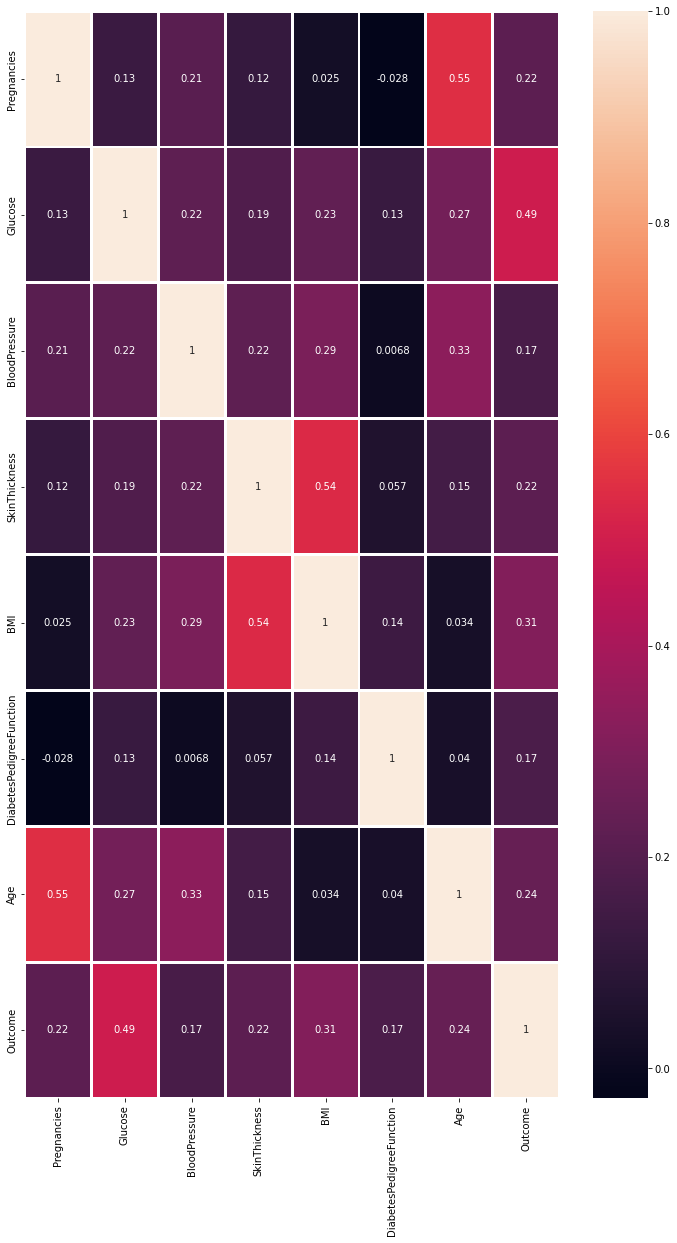

In [ ]:
#correlation visual using heatmap
plt.figure(figsize=(12,20))
sns.heatmap(df2.corr(),annot=True, linewidths=2)
plt.show

<Figure size 1440x1440 with 0 Axes>

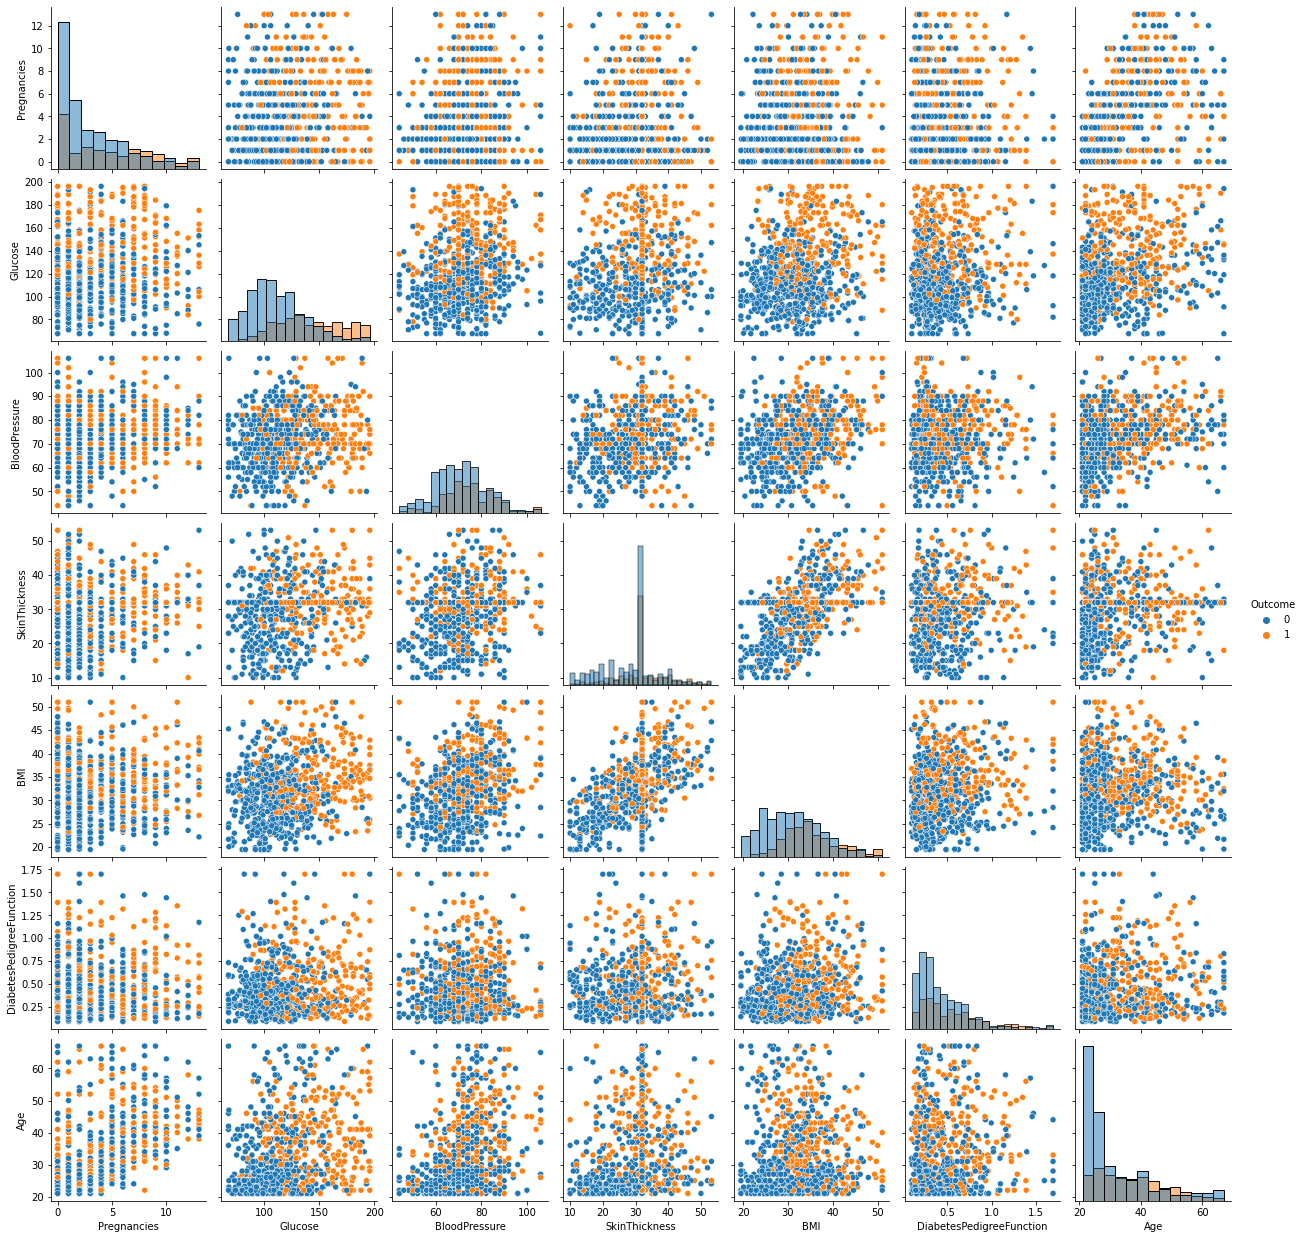

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df2, hue="Outcome", diag_kind="hist")
plt.show()

In [ ]:
#value count of column "outcome" 
df2["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df2.shape

(768, 8)

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.62700,50.0,1
1,1.0,85.0,66.0,29.0,26.6,0.35100,31.0,0
2,8.0,183.0,64.0,32.0,23.3,0.67200,32.0,1
3,1.0,89.0,66.0,23.0,28.1,0.16700,21.0,0
4,0.0,137.0,44.0,35.0,43.1,1.69833,33.0,1


In [ ]:
#checking correlation between features 
corr_matrix = df2.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492345
BMI                         0.312901
Age                         0.242215
SkinThickness               0.220517
Pregnancies                 0.219811
DiabetesPedigreeFunction    0.174064
BloodPressure               0.167922
Name: Outcome, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

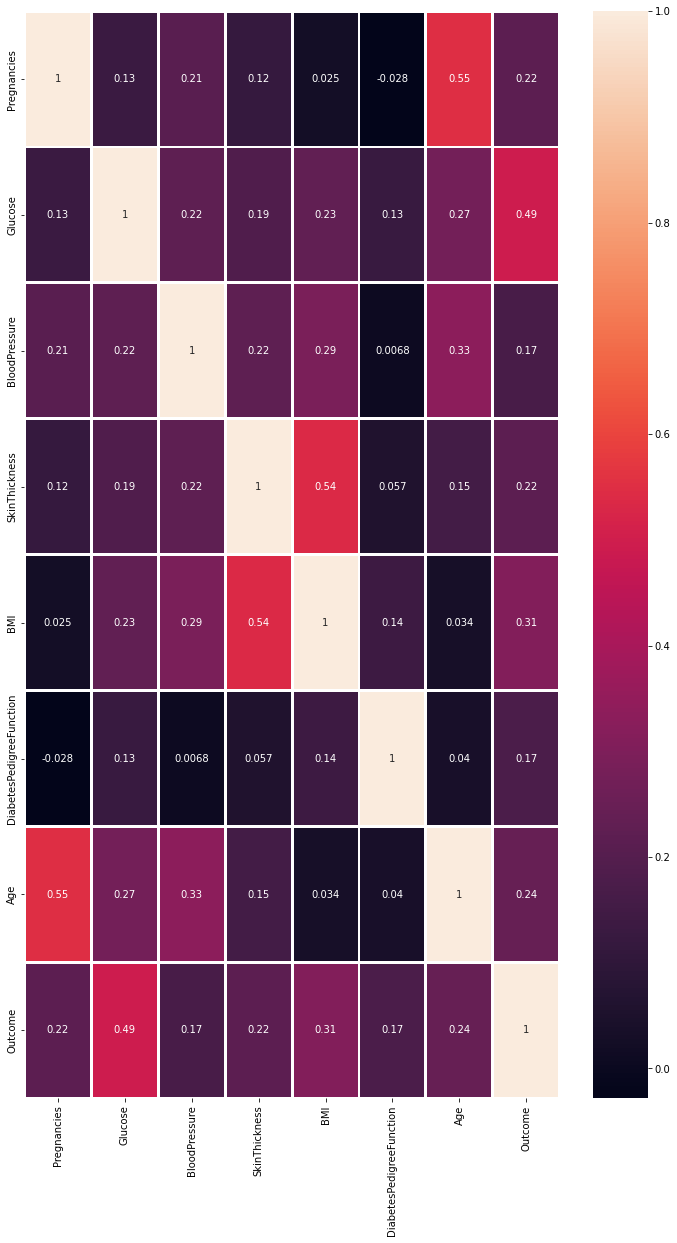

In [ ]:
#correlation visual using heatmap
plt.figure(figsize=(12,20))
sns.heatmap(df2.corr(),annot=True, linewidths=2)
plt.show

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.62700,50.0,1
1,1.0,85.0,66.0,29.0,26.6,0.35100,31.0,0
2,8.0,183.0,64.0,32.0,23.3,0.67200,32.0,1
3,1.0,89.0,66.0,23.0,28.1,0.16700,21.0,0
4,0.0,137.0,44.0,35.0,43.1,1.69833,33.0,1


# Data preprocessing

In [ ]:
#extracting input and output features 
X = df2.iloc[:,:-1].to_numpy()
y = df2.iloc[:,-1].to_numpy()


In [ ]:
print(X.shape)

(768, 7)


In [ ]:
# Handling Class Imbalance Problem using Over Sampling by SMOTETomek
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=0)
X_r, y_r = smk.fit_resample(X, y)
#type(smk)

In [ ]:
x=X_r
y=y_r

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape)
print(x_train)

(758, 7)
[[4.00e+00 1.46e+02 8.50e+01 ... 2.89e+01 1.89e-01 2.70e+01]
 [2.00e+00 1.00e+02 6.80e+01 ... 3.85e+01 3.24e-01 2.60e+01]
 [8.00e+00 1.07e+02 8.00e+01 ... 2.46e+01 8.56e-01 3.40e+01]
 ...
 [1.00e+00 9.90e+01 5.80e+01 ... 2.54e+01 5.51e-01 2.10e+01]
 [1.00e+00 8.90e+01 4.40e+01 ... 2.78e+01 5.59e-01 2.10e+01]
 [2.00e+00 9.20e+01 5.20e+01 ... 3.01e+01 1.41e-01 2.20e+01]]


In [ ]:
print(y_train.shape)
print(y_train)

(758,)
[0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1
 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1
 0 1 1 1 1 1 1 0 0

In [ ]:
print(x_test.shape)
print(x_test)

(190, 7)
[[  7.         190.79039813  68.         ...  36.72532619   0.51986935
   41.        ]
 [  1.         181.          78.         ...  40.           1.258
   22.        ]
 [  3.         122.          78.         ...  23.           0.254
   40.        ]
 ...
 [  5.         117.          86.         ...  39.1          0.251
   42.        ]
 [  5.         189.          64.         ...  31.2          0.583
   29.        ]
 [  4.61978382 146.82637843  78.         ...  37.8182378    0.55553427
   64.31427011]]


In [ ]:
print(y_test.shape)
print(y_test)

(190,)
[1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1]


**feature scaling**
* As all the input features are numerical values, we will perform standard z-score 
* xi=(xi−μi)÷σ
* where μ - mean, σ - standard deviation

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training Various Classification models from sklearn

In [ ]:
#creating pipeline
import sklearn.pipeline
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('std_scaler', StandardScaler()),
])

In [ ]:
df3 = my_pipeline.fit(df2)
#df3=df2.copy()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train, y_train)
y_predict=lreg.predict(x_test)
acc_score=accuracy_score(y_test,y_predict)
acc_score
#mean_squared_error(y_test, y_predict)

0.7421052631578947

In [ ]:
def model(model1):
    model1.fit(x_train, y_train)
    y_predict=model1.predict(x_test)
    acc_score=accuracy_score(y_test, y_predict)
    #return acc_score
    cm=confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Accuracy={acc_score}")
    plt.xlabel("predicted labels")
    plt.ylabel("actual labels")
    plt.show()
    print(classification_report(y_test, y_predict))
    return acc_score

# Logistic Regression

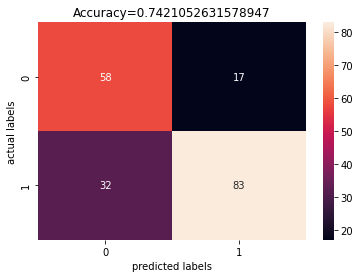

              precision    recall  f1-score   support

           0       0.64      0.77      0.70        75
           1       0.83      0.72      0.77       115

    accuracy                           0.74       190
   macro avg       0.74      0.75      0.74       190
weighted avg       0.76      0.74      0.74       190



In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(random_state=0).fit(X = x_test, y = y_test)
x1=model(reg)

# Gaussian NB

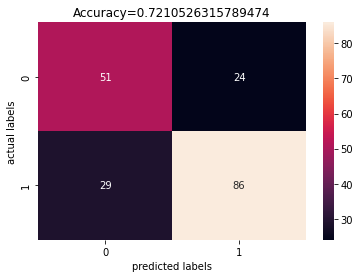

              precision    recall  f1-score   support

           0       0.64      0.68      0.66        75
           1       0.78      0.75      0.76       115

    accuracy                           0.72       190
   macro avg       0.71      0.71      0.71       190
weighted avg       0.72      0.72      0.72       190



In [ ]:
from sklearn.naive_bayes import GaussianNB
gsnb = GaussianNB()
x2=model(gsnb)

# Decision Tree

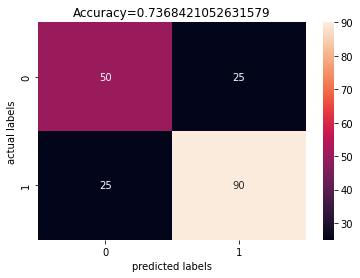

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        75
           1       0.78      0.78      0.78       115

    accuracy                           0.74       190
   macro avg       0.72      0.72      0.72       190
weighted avg       0.74      0.74      0.74       190



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dstc = DecisionTreeClassifier(criterion="entropy", random_state=0)
x3=model(dstc)

# Random Forest

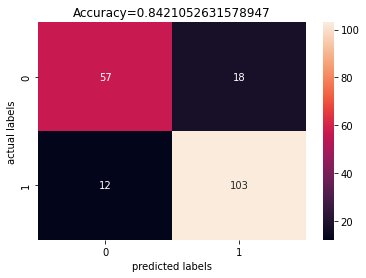

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        75
           1       0.85      0.90      0.87       115

    accuracy                           0.84       190
   macro avg       0.84      0.83      0.83       190
weighted avg       0.84      0.84      0.84       190



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
x4=model(rfc)

# ACCURACY SCORE AND STANDARD DEVIATION

In [ ]:
from sklearn.model_selection import cross_val_score
#cross_val_score(estimator,X,y,cv)
def models(model2):
    scores = cross_val_score(model2, X=x_train, y= y_train, cv=10)
    mean_score= scores.mean()
    std_score= scores.std()
    return mean_score, std_score
    #a=print(f"mean accuracy={mean_score*100}%")
    #b=print(f"standard deviation={std_score*100}%")

In [ ]:
reg2=LogisticRegression()
a1,b1=models(reg2)

In [ ]:
gnb2 = GaussianNB()
a2,b2=models(gnb2)

In [ ]:
dtc2= DecisionTreeClassifier(criterion="entropy", random_state=10)
a3,b3=models(dtc2)

In [ ]:
rfc2= RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=10)
a4,b4=models(rfc2)

# comprising

In [ ]:
model_comp2=pd.DataFrame({'model':['Logistic Regression', 'GassianNB', 'Decision Tress', 'Random Forest'], 'accuracy score':[x1, x2, x3, x4]})
model_comp2

,model,accuracy score
0,Logistic Regression,0.742105
1,GassianNB,0.721053
2,Decision Tress,0.736842
3,Random Forest,0.842105


In [ ]:
models_comp1=pd.DataFrame({'model':['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest'], 'mean_accuracy_score':[a1, a2, a3, a4],'standard deviation':[b1, b2, b3, b4]})
models_comp1.sort_values(by='mean_accuracy_score', ascending=False, ignore_index=True)

,model,mean_accuracy_score,standard deviation
0,Random Forest,0.815263,0.035726
1,Linear Regression,0.786263,0.036289
2,Decision Tree,0.770579,0.051930
3,Logistic Regression,0.757263,0.027069


In [ ]:

#some_data=X.iloc[:5]
some_label=y #y.iloc[:5]
prepare_data=my_pipeline.fit_transform(X)

In [ ]:
reg.predict(prepare_data[:10])

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
list(some_label[:10])

[1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

In [ ]:
df2.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0


In [ ]:
#sequence= Pregnancies, Glucose, BloodPressure, SkinThickness, BMI, DiabetesPedigreeFunction, Age, AgeLavel_Low, AgeLavel_Basic, AgeLavel_Average, AgeLavel_High, AgeLavel_SuperHigh
input_data = (5,166,72,39,35,0.8,51)
#std_data = int(input("enter data= 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)
std_data = my_pipeline.fit_transform(input_data_reshaped)
prediction = rfc.predict(std_data)
print(prediction)
if (prediction[0] == 0):
 print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# Conclusion
* cleaning raw data and data exploration (EDA) using pandas, numpy, matplotlib and seaborn
* feature engineering for analysis
* higher age has higher probability of Diabetes
* higher Glucose level has higher probability to diabetes
* Glucose is most correlated variable for diabetics
* glucose, BMI and age are highly positive correlated
* data preprocessing for implementing ml models
* implementing ml models ( Logistic Regression, GaussianNB, Decision Tree and Random Forest)
* best model is Random Forest with accuracy score 84.21, mean accuracy score 80.94 and standard deviation 0.039